# Pima Indians Diabetes Data Set数据探索

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段: 
0列为怀孕次数；
1列为口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度；
2列为舒张压（单位:mm Hg）
3列为三头肌皮褶厚度（单位：mm）
4列为餐后血清胰岛素（单位:mm）
5列为体重指数（体重（公斤）/ 身高（米）^2）
6列为糖尿病家系作用
7列为年龄
8列为分类变量（0或1）

数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

import必要的工具包，用于文件读取／特征编码

In [36]:
import numpy as np
import pandas as pd

数据文件路径和文件名

In [37]:
#input data
train = pd.read_csv("pima-indians-diabetes.csv")
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
#train.info()

粗看数据集没有缺失值
但该数据集已知存在缺失值，某些列中存在的缺失值被标记为0。通过这些列中指标的定义和相应领域的常识可以证实上述观点，譬如体重指数和血压两列中的0作为指标数值来说是无意义的。

In [39]:
#查看数值型特征的基本统计量
train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


从结果中我们可以看到很多列的最小值为0。而在一些特定列代表的变量中，0值并没有意义，这就表名该值无效或为缺失值。

具体来说，下列变量的最小值为0时数据无意义：
1、血浆葡萄糖浓度
2、舒张压
3、肱三头肌皮褶厚度
4、餐后血清胰岛素
5、体重指数

在Pandas的DataFrame中，通过replace()函数可以很方便的将我们感兴趣的数据子集的值标记为NaN。

标记完缺失值之后，可以利用isnull()函数将数据集中所有的NaN值标记为True，然后就可以得到每一列中缺失值的数量了。

In [40]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
train[NaN_col_names] = train[NaN_col_names].replace(0, np.NaN)
print(train.isnull().sum())

pregnants                         0
Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
Diabetes_pedigree_function        0
Age                               0
Target                            0
dtype: int64


### 对缺失值较多的特征，新增一个特征，表示这个特征是否缺失

In [41]:
#缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
train['Triceps_skin_fold_thickness_Missing'] = train['Triceps_skin_fold_thickness'].apply(lambda x: 1 if pd.isnull(x) else 0)
train[['Triceps_skin_fold_thickness','Triceps_skin_fold_thickness_Missing']].head(10)

,Triceps_skin_fold_thickness,Triceps_skin_fold_thickness_Missing
0,35.0,0
1,29.0,0
2,NaN,1
3,23.0,0
4,35.0,0
5,NaN,1
6,32.0,0
7,NaN,1
8,45.0,0
9,NaN,1


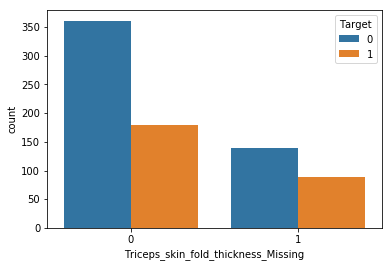

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline
sns.countplot(x="Triceps_skin_fold_thickness_Missing", hue="Target",data=train)

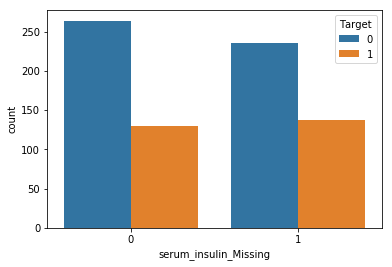

In [43]:
#缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
train['serum_insulin_Missing'] = train['serum_insulin'].apply(lambda x: 1 if pd.isnull(x) else 0)
sns.countplot(x="serum_insulin_Missing", hue="Target",data=train)

不过特征是否缺失好像和目标也没什么关系

In [44]:
train.drop(["Triceps_skin_fold_thickness_Missing", "serum_insulin_Missing"], axis=1, inplace=True)

感觉特征缺失是随机的，将这新增的特征删除，老实用中值填补算了。

In [45]:
medians = train.median() 
train = train.fillna(medians)

print(train.isnull().sum())

pregnants                       0
Plasma_glucose_concentration    0
blood_pressure                  0
Triceps_skin_fold_thickness     0
serum_insulin                   0
BMI                             0
Diabetes_pedigree_function      0
Age                             0
Target                          0
dtype: int64


### 数据标准化

In [46]:
#  get labels
y_train = train['Target']   
X_train = train.drop(["Target"], axis=1)

#用于保存特征工程之后的结果
feat_names = X_train.columns

# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)

/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 特征处理结果存为文件

In [60]:
#存为csv格式
X_train = pd.DataFrame(columns = feat_names, data = X_train)
print(X_train.shape[0])
instant=pd.DataFrame(data=np.arange(X_train.shape[0]),columns=["instant"])
train = pd.concat([instant,X_train, y_train], axis = 1)

train.to_csv('FE_pima-indians-diabetes.csv',index = False,header=True)

768


In [61]:
train.head()

,instant,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1
